In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import norm
np.random.seed(0)

X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+10 # Create data cluster 1
X1 = X*np.random.rand(len(X))-10 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above

In [92]:
# Define model parameters
A = np.array([[0.4, 0.5, 0.1], 
              [0.2, 0.7, 0.1], 
              [0.1, 0.3, 0.6]])

C = np.array([0.4, 0.5, 0.1])

B = np.array([[0.7, 0.0, 0.3], 
              [0.1, 0.4, 0.5], 
              [0.0, 0.2, 0.8],
              ])


O = np.array([0, 2, 0, 2, 2, 1]).astype(np.int32)

In [12]:
# Define model parameters
A = np.array([[0.5, 0.5], 
              [0.4, 0.6],] 
              )

C = np.array([0.5, 0.5])

B = np.array([[0.2, 0.3, 0.3, 0.2], 
              [0.3, 0.2, 0.2, 0.3],
              ])


O = np.array([2, 2, 1, 0, 1, 3, 2, 0, 0]).astype(np.int32)

In [37]:
toy_pis = np.array([0.1,0.2,0.3,0.4])
toy_trans_probs = np.array([[0.1,0.2,0.3,0.4],[0.4, 0.3,0.2,0.1],[0.2,0.3,0.4,0.1],[0.3,0.4,0.2,0.1]])
toy_emission_probs = np.array([[0.1,0.4,0.5],[0.5,0.3,0.2],[0.3,0.2,0.5],[0.1,0.5,0.4]])
toy_x = np.array([0,1,2,0,1])

In [44]:
toy_pis = [0.1,0.2,0.3,0.4]
toy_trans_probs = [[0.1,0.2,0.3,0.4],[0.4, 0.3,0.2,0.1],[0.2,0.3,0.4,0.1],[0.3,0.4,0.2,0.1]]
toy_emission_probs = [[0.1,0.4,0.5],[0.5,0.3,0.2],[0.3,0.2,0.5],[0.1,0.5,0.4]]
toy_x = [0,1,2,0,1]

[1, 0, 3, 1, 0]

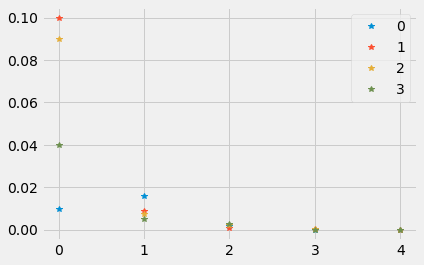

In [47]:
viterbi(toy_pis, toy_trans_probs,toy_emission_probs,toy_x)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

def viterbi(pis: np.ndarray, trans_probs: np.ndarray, emission_probs: np.ndarray, x: np.ndarray) -> np.ndarray:
    # pis: initial probability in a one-dimensional array with m elements
    # trans_probs: transition probability (i.e., trans_probs[i,j] is P(Z_{t+1}=j | Z_t=i)), 2d-array with shape (m, m)
    # emission_probs: emission probability, emission_probs[i,k] is P(X_t=k | Z_t=i), 2d-array with shape (m, size of X's domain)
    # x: an observational sequence in a 1d array with n elements
    
    #type casting 
    pis = np.array(pis)
    trans_probs = np.array(trans_probs)
    emission_probs = np.array(emission_probs)
    x = np.array(x)
    
    
    T, E, n, m = trans_probs, emission_probs, len(x), len(pis)
    mu = np.zeros((n, m))  # to fill in
    max_seq = [None] * n  # to return

    # TODO
    # hidden state (Z) 에서 가능한 변수의 수는 m 개. 따라서, 전이확률은 전체 m개의 가능성에서 m 개의 가능성으로 옮겨지는 것.
    # 이 상황에서, pis 맨 처음의 확률!
    #
    
    # emission problem : m개의 가능한 변수들 중에서 -> x가 될 수 있는 갯수. 즉 m * x_t.shape
    
    
    # calculate mu1
    mu_old = [0] * m
    for i in range(m):
        mu_old[i] += pis[i] * E[i,x[0]]
        
    
    
    mu[0] = mu_old
    # calculate remain
    
    # calculate candidate
    for leng in range(1,n):
        mu_new_candidiate = np.zeros([m,m])
        for i in range(m):
            for j in range(m) :
                mu_new_candidiate[i,j] += mu[leng-1][i] *T[i,j] * E[j, x[leng]]
                
        # choose the max one
        mu[leng] = np.max(mu_new_candidiate, axis = 0)
        # choose the sum one
        #mu[leng] = np.sum(mu_new_candidiate, axis = 0)
        
    for i in range(len(max_seq)):
        itera = len(max_seq) - i - 1
        max_seq[itera] = np.argmax(mu[itera])
    
    for i in range(mu.shape[1]):
        plt.plot(mu[:,i],'*')
    
    plt.legend(list(range(mu.shape[1])))
    return max_seq
